In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [94]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('cleaned_v5.csv', index_col=0)

In [4]:
df.head()

,rating,city,province,superhost,price,house_type,link,Hangers,Bed linens,Extra pillows and blankets,...,game console,guest_num,bath_num,id,pool,backyard,free carport,ski-in,beach access,balcony
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,buraydah,AlQassim,0.0,1100,Earth house,https://www.airbnb.com/rooms/44085675?previous...,1,1,1,...,1,10,3.0,0.0BuraydahAlQassimFalse1100.0Earth house,0,1,0,0,0,1
1,0.0,buraydah,AlQassim,0.0,2200,Entire chalet,https://www.airbnb.com/rooms/19854001?previous...,1,0,0,...,0,4,4.0,0.0BuraydahAlQassimFalse2200.0Entire chalet,1,0,0,0,0,0
2,0.0,buraydah,AlQassim,0.0,400,Shared room in chalet,https://www.airbnb.com/rooms/37763947?previous...,1,0,0,...,0,16,4.5,0.0BuraydahAlQassimFalse400.0Shared room in ch...,1,0,0,0,0,0
3,0.0,buraydah,AlQassim,0.0,550,Private room in resort,https://www.airbnb.com/rooms/44031535?previous...,1,1,1,...,0,5,2.0,0.0BuraydahAlQassimFalse550.0Private room in r...,1,0,0,0,0,0
4,0.0,buraydah,AlQassim,0.0,2500,Entire villa,https://www.airbnb.com/rooms/35754885?previous...,1,0,0,...,0,7,3.0,0.0BuraydahAlQassimFalse2500.0Entire villa,1,0,0,0,0,0


In [5]:
test = df[df.rating != 0]

## Problem:
province has some errors

In [6]:
df.groupby(['province'])['price'].sum().sort_values()[::-1]



province
Mecca          503947
Riyadh         489244
Eastern        136194
Medina          78948
Asir            70199
AlQassim        37641
Tabuk            8793
SaudiArabia      5167
Ha'il             600
Al Bahah          500
West              250
Jizan              85
Name: price, dtype: int64

In [7]:
to_modifiy = ['SaudiArabia',
             'West']

In [8]:
df[df['province']  == to_modifiy[0]]['link']

index
446     https://www.airbnb.com/rooms/32981610?previous...
642     https://www.airbnb.com/rooms/40233658?previous...
1080    https://www.airbnb.com/rooms/31290673?previous...
1147    https://www.airbnb.com/rooms/52120401?previous...
1148    https://www.airbnb.com/rooms/52044809?previous...
1337    https://www.airbnb.com/rooms/30261396?previous...
1358    https://www.airbnb.com/rooms/32461582?previous...
1545    https://www.airbnb.com/rooms/48231186?previous...
1635    https://www.airbnb.com/rooms/48744340?previous...
1652    https://www.airbnb.com/rooms/38116013?previous...
1716    https://www.airbnb.com/rooms/37942037?previous...
1858    https://www.airbnb.com/rooms/49905128?previous...
Name: link, dtype: object

In [9]:
df.loc[446      ,'province'] = 'Eastern'

In [10]:
df.loc[642      ,'province'] = 'Riyadh'

In [11]:
df.loc[1080      ,'province'] = 'Mecca'

In [12]:
df.loc[1147      ,'province'] = 'Mecca'

In [13]:
df.loc[1148      ,'province'] = 'Mecca'

In [14]:
df.loc[1337      ,'province'] = 'Mecca'

In [15]:
df.loc[1358      ,'province'] = 'Mecca'

In [16]:
df.loc[1635      ,'province'] = 'Riyadh'

In [17]:
df.loc[1545      ,'province'] = 'Riyadh'

In [18]:
df.loc[1652      ,'province'] = 'Riyadh'

In [19]:
df.loc[1716      ,'province'] = 'Riyadh'

In [20]:
df.loc[1858      ,'province'] = 'Tabuk'

In [22]:
df.groupby(['province'])['price'].sum().sort_values()[::-1]

province
Mecca       507047
Riyadh      490629
Eastern     136444
Medina       78948
Asir         70199
AlQassim     37641
Tabuk         9225
Ha'il          600
Al Bahah       500
West           250
Jizan           85
Name: price, dtype: int64

In [23]:
df[df['province']  == to_modifiy[1]]['link']

index
851    https://www.airbnb.com/rooms/42831842?previous...
Name: link, dtype: object

In [24]:
df.loc[851    ,'province'] = 'Mecca'

In [25]:
df.groupby(['province'])['price'].count().sort_values()[::-1]

province
Riyadh      723
Mecca       637
Eastern     193
Medina      143
Asir         94
AlQassim     58
Tabuk        12
Al Bahah      2
Jizan         1
Ha'il         1
Name: price, dtype: int64

In [27]:
prov = {
'Mecca':1,
'Riyadh':2,
'Eastern':3,
'Medina':4,
'Asir':5,
'AlQassim':6,
'Tabuk':7,
'Ha\'il':8  ,
'Al Bahah':9 ,
'Jizan':10} 

In [28]:
df['province'].replace(prov, inplace=True)

In [30]:
df.groupby(['province'])['price'].count().sort_values()[::-1]

province
2     723
1     637
3     193
4     143
5      94
6      58
7      12
9       2
10      1
8       1
Name: price, dtype: int64

In [32]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1864 entries, 0 to 1864
Data columns (total 144 columns):
 #    Column                             Non-Null Count  Dtype  
---   ------                             --------------  -----  
 0    rating                             1864 non-null   float64
 1    city                               1864 non-null   object 
 2    province                           1864 non-null   int64  
 3    superhost                          1863 non-null   float64
 4    price                              1864 non-null   int64  
 5    house_type                         1864 non-null   object 
 6    link                               1864 non-null   object 
 7    Hangers                            1864 non-null   int64  
 8    Bed linens                         1864 non-null   int64  
 9    Extra pillows and blankets         1864 non-null   int64  
 10   Room-darkening shades              1864 non-null   int64  
 11   Suitable for events                1864 n

C:\Users\elaaf\AppData\Local\Temp/ipykernel_28100/2612161665.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


In [33]:
df.head(5)

,rating,city,province,superhost,price,house_type,link,Hangers,Bed linens,Extra pillows and blankets,...,game console,guest_num,bath_num,id,pool,backyard,free carport,ski-in,beach access,balcony
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,buraydah,6,0.0,1100,Earth house,https://www.airbnb.com/rooms/44085675?previous...,1,1,1,...,1,10,3.0,0.0BuraydahAlQassimFalse1100.0Earth house,0,1,0,0,0,1
1,0.0,buraydah,6,0.0,2200,Entire chalet,https://www.airbnb.com/rooms/19854001?previous...,1,0,0,...,0,4,4.0,0.0BuraydahAlQassimFalse2200.0Entire chalet,1,0,0,0,0,0
2,0.0,buraydah,6,0.0,400,Shared room in chalet,https://www.airbnb.com/rooms/37763947?previous...,1,0,0,...,0,16,4.5,0.0BuraydahAlQassimFalse400.0Shared room in ch...,1,0,0,0,0,0
3,0.0,buraydah,6,0.0,550,Private room in resort,https://www.airbnb.com/rooms/44031535?previous...,1,1,1,...,0,5,2.0,0.0BuraydahAlQassimFalse550.0Private room in r...,1,0,0,0,0,0
4,0.0,buraydah,6,0.0,2500,Entire villa,https://www.airbnb.com/rooms/35754885?previous...,1,0,0,...,0,7,3.0,0.0BuraydahAlQassimFalse2500.0Entire villa,1,0,0,0,0,0


In [ ]:
df.to_csv('cleaned_v6.csv')

## EDA

In [5]:

from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression

from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)

In [6]:
#test.iloc[:,:10]

In [7]:
L = df.columns

[x for x in L if 'pool' in x]

NameError: name 'df' is not defined

In [42]:
p = list(prov.keys())

In [48]:
#fig, ax = plt.subplots()
#plt.figure(figsize=(25,7));
#ax.set_xticks(p) 
#sns.lineplot(x=prov[df.province], y=df.price)

In [49]:
#plt.figure(figsize=(25,7));
#sns.catplot(x=df.pool, y=df.price, data = df)
#sns.catplot(x=df.tv, y=df.price, data = df)

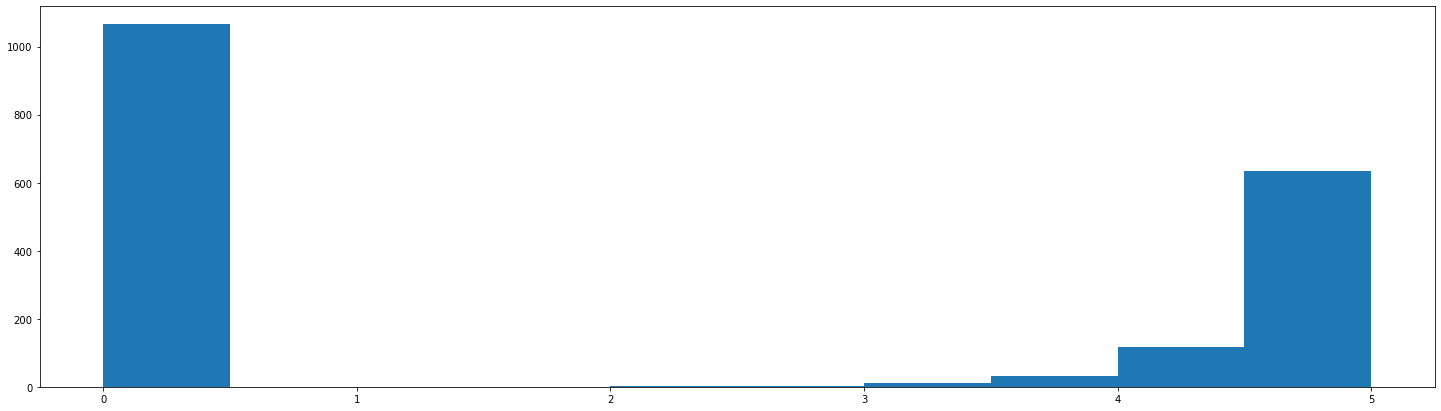

In [70]:
plt.figure(figsize=(25,7));
plt.hist(df.rating);

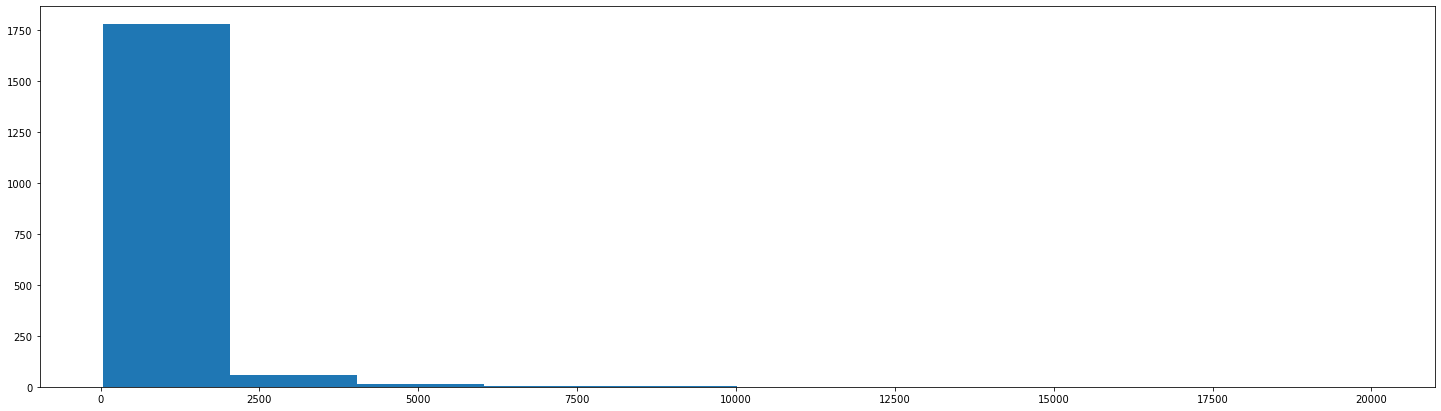

In [71]:
plt.figure(figsize=(25,7));
plt.hist(df.price);

In [ ]:
#x = list(x.columns)
#x.sort()
#x

#cols = list(df.columns)
#for i in cols:
#    value = sum(df[i].isna()) 
#    if value!=0:
#        print(i)
    #else:
        #print(i)
#df.loc[1863, 'superhost'] = 0

In [10]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression

from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error

In [53]:
df = pd.read_csv('data_v9.csv', index_col=0)

In [86]:
df.head()

,rating,city,province,superhost,price,house_type,link,Room-darkening shades,Suitable for events,Window guards,...,child_friendly,heating,home_utensils,mean_per_prov,appliance,sauna,entertainment,safety,boat,internet
0,0.0,buraydah,6,0,1100,Earth house,https://www.airbnb.com/rooms/44085675?previous...,1,1,1,...,1,1,1,560.000000,1,0,0,1,0,1
1,0.0,buraydah,6,0,2200,Entire chalet,https://www.airbnb.com/rooms/19854001?previous...,0,1,0,...,0,1,1,702.263158,1,0,0,0,0,0
2,0.0,buraydah,6,0,400,Shared room in chalet,https://www.airbnb.com/rooms/37763947?previous...,0,1,0,...,0,1,1,400.000000,0,0,0,0,0,0
3,0.0,buraydah,6,0,550,Private room in resort,https://www.airbnb.com/rooms/44031535?previous...,1,1,0,...,0,0,1,450.000000,0,0,0,1,0,0
4,0.0,buraydah,6,0,2500,Entire villa,https://www.airbnb.com/rooms/35754885?previous...,0,0,0,...,0,1,1,1852.000000,1,0,0,1,0,1


In [54]:
df.shape

(1864, 105)

In [85]:
c = list(df.columns)
c.sort()
c

['Baking sheet',
 'Bathtub',
 'Beach essentials',
 'Bed_num',
 'Bikes',
 'Breakfast',
 'Building staff',
 'Carbon monoxide alarm',
 'Ceiling fan',
 'Cleaning before checkout',
 'Cleaning products',
 'Cooking basics',
 'Dining table',
 'EV charger',
 'Elevator',
 'Essentials',
 'Fire pit',
 'First aid kit',
 'Hammock',
 'Host greets you',
 'Hot tub',
 'Keypad',
 'Lake access',
 'Laundromat nearby',
 'Lock on bedroom door',
 'Lockbox',
 'Long term stays allowed',
 'Luggage dropoff allowed',
 'Mosquito net',
 'Outdoor dining area',
 'Outdoor furniture',
 'Outdoor shower',
 'Paid resort access',
 'Pets allowed',
 'Piano',
 'Portable fans',
 'Portable heater',
 'Private entrance',
 'Private hot tub',
 'Private living room',
 'Resort access',
 'Room-darkening shades',
 'Self check-in',
 'Shared hot tub',
 'Shower gel',
 'Single level home',
 'Smart lock',
 'Smoking allowed',
 'Suitable for events',
 'Table corner guards',
 'Trash compactor',
 'Waterfront',
 'Window guards',
 'Wine glasses',


## Experiment 1 

In [55]:
x = df.drop(columns = ['id', 'price', 'city', 'province', 'house_type', 'link'])
y = df['price']

In [57]:
model = LinearRegression()

In [58]:
x = df.drop(columns = ['id', 'price', 'city', 'province', 'house_type', 'link'])
y = df['price']
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x, 
                                        y, test_size=0.2, random_state=40)
m = model.fit(X_train, y_train)
print(m.score(X_test, y_test) * 100, mean_absolute_error(y_pred, y_test))
y_pred = m.predict(X_test)

In [61]:
m = model.fit(X_train, y_train)

In [62]:
print(m.score(X_test, y_test) * 100, mean_absolute_error(y_pred, y_test))

34.566135965863275 402.0275488129502


In [63]:
y_pred = m.predict(X_test)

In [64]:
from sklearn.metrics import mean_absolute_error


## Experiment 2
 with scaling

In [65]:
x = df.drop(columns = ['id', 'price', 'city', 'province', 'house_type', 'link'])
y = df['price']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(x, 
                                        y, test_size=0.2, random_state=40)

In [67]:
std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)


In [68]:
m = LinearRegression()
m.fit(X_train_scaled,y_train)
m.score(X_test_scaled,y_test) * 100

34.56998176752917

In [69]:
mean_absolute_error(m.predict(X_test_scaled), y_test)

402.0570676516582

## Experiment 3
 with polynomial features

In [70]:
x = df.drop(columns = ['id', 'price', 'city', 'province', 'house_type', 'link'], inplace=False)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(x, 
                                        y, test_size=0.2, random_state=40)

In [71]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [72]:
std = StandardScaler()
X_train_scaled = std.fit_transform(X_train_poly)
X_test_scaled = std.transform(X_test_poly)

In [73]:
lr_poly = LinearRegression()
lr_poly = lr_poly.fit(X_train_scaled, y_train)
lr_poly.score(X_test_scaled,y_test) * 100

-3.9044928364439175e+20

In [74]:
mean_absolute_error(lr_poly.predict(X_test_poly), y_test)

1.2145100503548034e+16

## Experiment 4
 with feature Selection

In [90]:
x = df.drop(columns = ['id', 'price', 'city', 'province', 'house_type', 'link'])
y = df['price']
#X_train, X_test, y_train, y_test = train_test_split(x, 
#                                        y, test_size=0.2, random_state=40)

In [95]:
from sklearn.feature_selection import SelectKBest,f_regression

fs = SelectKBest(score_func=f_regression, k=25)

X_selected = fs.fit_transform(x, y)


cols = fs.get_support(indices=True)

In [96]:
x = x.iloc[:,cols]
y = df['price']


In [97]:
len(cols)

25

In [78]:
X_train, X_test, y_train, y_test = train_test_split(x, 
                                        y, test_size=0.2, random_state=40)

In [79]:
m = LinearRegression()
m.fit(X_train,y_train)
m.score(X_test,y_test) * 100

33.849609115994596

In [80]:
mean_absolute_error(m.predict(X_test), y_test)

380.841963077402

In [81]:
33.849609115994596, 380.841963077402

(33.849609115994596, 380.841963077402)

In [82]:
#sns.pairplot(df.iloc[:,cols])

## Experiment 5
with Manual Grid Search for best number of features

In [83]:
x = df.drop(columns = ['id', 'price', 'city', 'province', 'house_type', 'link'])
y = df['price']

In [84]:
df.shape[1]

105

In [85]:
sz = df.shape[1] -1
scores = [0]*(sz-7)
mae_error = [0]*(sz-7)
num_of_features = [0]*(sz-7)


for i in range(1,sz-6):
    x = df.drop(columns = ['id', 'price', 'city', 'province', 'house_type', 'link'])
    y = df['price']
    fs = SelectKBest(score_func=f_regression, k=i)
    X_selected = fs.fit_transform(x, y)
    cols = fs.get_support(indices=True)
    x = x.iloc[:,cols]
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(x, 
                                            y, test_size=0.2, random_state=40)
    m = LinearRegression().fit(X_train,y_train)
    scores[i-1] = m.score(X_test,y_test) * 100
    mae_error[i-1] = mean_absolute_error(m.predict(X_test), y_test)
    num_of_features[i-1] = i


In [86]:
scores[scores.index(max(scores))]

36.32524852538283

In [87]:
best_score = scores.index(max(scores))
best_score

62

In [88]:
mae_error.index(min(mae_error))

4

In [89]:
print(mae_error[4], scores[4])

356.24414128948195 35.36137989042554


In [90]:
#plt.figure(figsize=(15,4));
#sns.lineplot(x=num_of_features,y=scores);

In [91]:
x = df.drop(columns = ['id', 'price', 'city', 'province', 'house_type', 'link'])
y = df['price']
fs = SelectKBest(score_func=f_regression, k=best_score)
X_selected = fs.fit_transform(x, y)
cols = fs.get_support(indices=True)
x = x.iloc[:,cols]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(x, 
                                        y, test_size=0.2, random_state=40)

m = LinearRegression().fit(X_train,y_train)
print('score', m.score(X_test,y_test) * 100)
print('mae', mean_absolute_error(m.predict(X_test), y_test))

score 36.032756552371325
mae 394.4275967064814


## Exp 7
Ridge and Lasso

In [92]:
x = df.drop(columns = ['id', 'price', 'city', 'province', 'house_type', 'link'])
y = df['price']
fs = SelectKBest(score_func=f_regression, k=best_score)
X_selected = fs.fit_transform(x, y)
cols = fs.get_support(indices=True)
x = x.iloc[:,cols]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(x, 
                                        y, test_size=0.2, random_state=40)

In [93]:
alphas = np.linspace(0.001, 1,100)
kf = KFold(5, random_state=42, shuffle=True )

params = {'alpha':alphas}
gs = GridSearchCV(Lasso(), param_grid=params, cv=kf)
model = gs.fit(X_train, y_train)

In [94]:
print('score', model.score(X_test,y_test) * 100)
print('mae', mean_absolute_error(model.predict(X_test), y_test))

score 36.50024047047358
mae 383.2017860980756


# Ridge: 
    score 36.03332215368384
    mae 394.42269327788296

# Lasso
    score 36.50024047047358
    mae 383.2017860980756

# Elastic Net
    score 36.193263626919794
    mae 391.6534938751397


## Exp 8
remove outliers

In [111]:
x = df.drop(columns = ['id', 'price', 'city', 'province', 'house_type', 'link'])
y = df['price']
#X_train, X_test, y_train, y_test = train_test_split(x, 
#                                        y, test_size=0.2, random_state=40)

In [112]:
from numpy import mean
from numpy import std
from sklearn.feature_selection import SelectKBest, f_regression
data = y

data_mean, data_std = mean(y), std(y)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 28
Non-outlier observations: 1836


In [113]:
outliers_index = [i for i,x in zip(data.index, data) if x < lower or x > upper]
outliers_index[:5]

[449, 464, 466, 470, 495]

In [114]:
x_no_outliers = x.drop(index=outliers_index)
y_no_outliers = y.drop(index=outliers_index)

In [115]:
print(x.shape, x_no_outliers.shape)
print(y.shape[0], y_no_outliers.shape[0])

(1864, 99) (1836, 99)
1864 1836


In [116]:
alphas = np.linspace(0.001, 1,100)
kf = KFold(5, random_state=42, shuffle=True )

params = {'alpha':alphas}
gs = GridSearchCV(ElasticNet(), param_grid=params, cv=kf)
model = gs.fit(X_train, y_train)

In [117]:
fs = SelectKBest(score_func=f_regression, k=best_score)
X_selected = fs.fit_transform(x_no_outliers,  y_no_outliers)
cols = fs.get_support(indices=True)
x = x.iloc[:,cols]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(x_no_outliers,  y_no_outliers
                                                    , test_size=0.2, random_state=40)

In [118]:
alphas = np.linspace(0.001, 1,100)
kf = KFold(5, random_state=42, shuffle=True )

params = {'alpha':alphas}
gs = GridSearchCV(ElasticNet(), param_grid=params, cv=kf)
model = gs.fit(X_train, y_train)

In [119]:
print('score', model.score(X_test,y_test) * 100)
print('mae', mean_absolute_error(model.predict(X_test), y_test))

score 45.87381133184274
mae 270.78518830541833


In [104]:
best_score

62

In [105]:
###########

In [106]:
sz = df.shape[1] -1
scores = [0]*(sz-7)
mae_error = [0]*(sz-7)
num_of_features = [0]*(sz-7)


for i in range(1,sz-6):
    x = x_no_outliers.copy(deep=True)
    y = y_no_outliers.copy(deep=True)
    fs = SelectKBest(score_func=f_regression, k=i)
    X_selected = fs.fit_transform(x, y)
    cols = fs.get_support(indices=True)
    x = x.iloc[:,cols]
    
    X_train, X_test, y_train, y_test = train_test_split(x, 
                                            y, test_size=0.2, random_state=40)
    m = LinearRegression().fit(X_train,y_train)
    scores[i-1] = m.score(X_test,y_test) * 100
    mae_error[i-1] = mean_absolute_error(m.predict(X_test), y_test)
    num_of_features[i-1] = i
best_score = scores.index(max(scores))
best_score

2

In [107]:
fs = SelectKBest(score_func=f_regression, k=best_score)
X_selected = fs.fit_transform(x_no_outliers,  y_no_outliers)
cols = fs.get_support(indices=True)
x = x.iloc[:,cols]
y = y_no_outliers
X_train, X_test, y_train, y_test = train_test_split(x_no_outliers,  y_no_outliers
                                                    , test_size=0.2, random_state=40)

In [108]:
alphas = np.linspace(0.001, 1,100)
kf = KFold(5, random_state=42, shuffle=True )

params = {'alpha':alphas}
gs = GridSearchCV(ElasticNet(), param_grid=params, cv=kf)
model = gs.fit(X_train, y_train)

In [109]:
print('score', model.score(X_test,y_test) * 100)
print('mae', mean_absolute_error(model.predict(X_test), y_test))

score 45.87381133184274
mae 270.78518830541833


## plot data

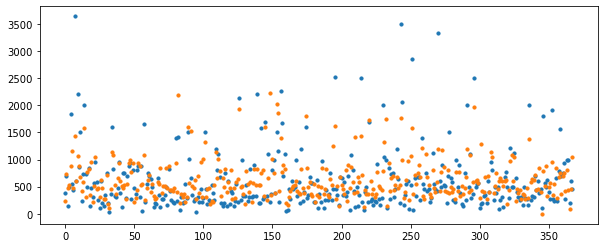

In [583]:
plt.figure(figsize=(10,4))
plt.scatter(range(y_test.shape[0]), y_test, s=10)
plt.scatter(range(y_test.shape[0]),model.predict(X_test),s=10)

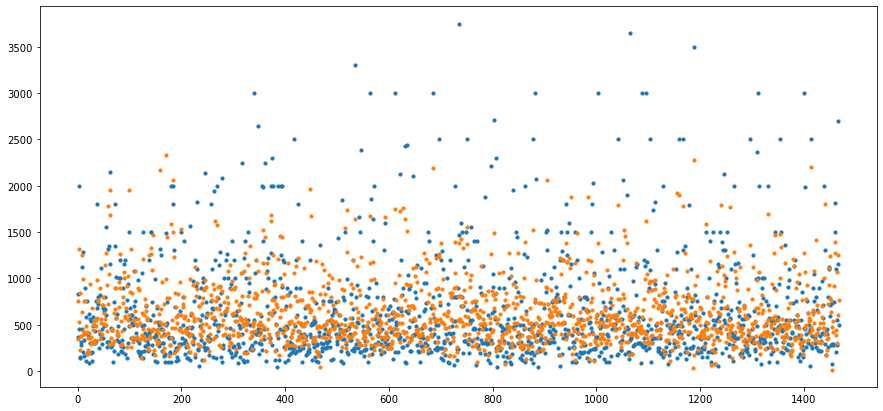

In [584]:
plt.figure(figsize=(15,7))
plt.scatter(range(y_train.shape[0]), y_train, s=10)
plt.scatter(range(model.predict(X_train).shape[0]),model.predict(X_train),s=10)

In [521]:
range(y_test.shape[0])

373

In [112]:
df.groupby(['province'])[['price']].mean()

,price
province,
1,796.384615
2,678.601660
3,706.963731
4,552.083916
5,746.797872
6,648.982759
7,768.750000
8,600.000000
9,250.000000


### Random Forest
Same as above but apply random forest. It has teh highset Score 

In [107]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_test, y_test)
print(regr.predict(X_test))

[ 841.08498213  451.37661189  535.26413618  469.12546392  535.26413618
  724.79003154  469.12546392  553.4139353   743.06717535  451.37661189
  469.12546392 1541.95448434  451.37661189  469.12546392  469.12546392
 1952.90542344  462.1643909  1429.09087454 1345.77368831  543.16110536
  451.37661189  451.37661189 1740.0097997   462.1643909   451.37661189
  469.12546392  578.40920751  451.37661189  553.4139353   451.37661189
 1710.77178034 1677.49302592  495.70177383  451.37661189  451.37661189
  451.37661189  458.33768491  458.33768491  451.37661189  451.37661189
  546.45286228  462.1643909   469.12546392  458.33768491  458.33768491
  451.37661189 2300.57437934  535.26413618 1759.0848113   451.37661189
 1505.61041882  451.37661189  469.12546392  469.12546392  469.12546392
  451.37661189 1373.71242033  543.88417708  553.4139353   451.37661189
 1752.46426732  451.37661189  553.94888437  469.12546392 1837.96072031
  451.37661189  546.45286228  469.12546392  451.37661189  535.26413618
  451.

In [108]:
x = df.drop(columns = ['id', 'price', 'city', 'province', 'house_type', 'link'])
y = df['price']

In [123]:

model = LinearRegression()
#X_train, X_test, y_train, y_test = train_test_split(x, 
#                                        y, test_size=0.2, random_state=40)
m = RandomForestRegressor(max_depth=2, random_state=0).fit(X_train, y_train)

y_pred = m.predict(X_test)
print(m.score(X_test, y_test) * 100, mean_absolute_error(y_pred, y_test))


47.1229479760376 273.8507774076993
